# Hands-On Deep Neural Networks - Part 1

In what follows we will describe the components of a **D**eep **N**eural **N**etwork (DNN).<br>
The paper *"Deep Learning: An Introduction for Applied Mathematicians" (SIAM REVIEW, Vol.61, No. 4, 2019, p.860-891) by Catherine F. Higham and Desmond J. Higham* was our inspiration/guide. 


In what follows, we will discuss the following topics:
* Motivation
* Activation function
* Neural network
* Cost function
* Optimization
* Back propagation

The **prerequisites** for this section are some knowledge of: 
* partial derivatives and the chain rule
* matrix multiplication
* Python and NumPy

Further:
* Each section will have a short $\textcolor{green}{\textbf{coding exercise}}$.
* The code from these exercises will then be assembled into a working DNN code.
* We will use this DNN code to perform to train a DNN and perform some DNN inference.

In Part 2 , we will perform the same training and inference but we will rely on existing
software (PyTorch and Jax) 


### 1.Activation function

The $\textcolor{blue}{\textbf{activation function}}$ $f(x)$ is an operator which:
- transforms an **input** signal in a $\textcolor{green}{\textbf{non-linear}}$ way.
- and generates an **output** signal ($\textcolor{green}{\textbf{activation}}$).
  
It was modeled after a biological neuron. Thus, we can speak of an artificial neuron.

Several activation functions are used in DNNs, among them we find:
* $\textcolor{blue}{\textbf{sigmoid}}$ function:  $\displaystyle f(x):= \frac{1}{1+e^{-x}}$,&nbsp; for $x \in \mathbb{R}$
* $\textcolor{blue}{\textbf{tanh}}$ function   :  $\displaystyle f(x):= \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$,&nbsp; for $x \in \mathbb{R}$
* $\textcolor{blue}{\textbf{ReLU}}$ function   :  $\displaystyle f(x):= \texttt{max}(0,x)$,&nbsp; for $x \in \mathbb{R}$<br>
  - ReLU: Rectified Linear Unit
  - $\textcolor{red}{\textbf{non-differentiable}}$ at $x=0$
* $\textcolor{blue}{\textbf{GELU}}$ function   :  $\displaystyle f(x):= x \mathbb{P}(Z<x)$,&nbsp; for $x \in \mathbb{R}$ where $Z \sim N(0,1)$<br>
  - GELU: Gaussian Error Linear Unit
  - $\displaystyle f(x):= x \mathbb{P}(Z<x) = x\Phi(x) = x \int_{-\infty}^x \frac{e^{-t^2/2}}{\sqrt{2\pi}}dt$

**Note:**
* In DNNs, the activation function takes the argument $w.x+b$ instead of $x$,<br>
  where:
  - $w$ : $\textcolor{blue}{\textbf{weight}}$, i.e. *scaling*
  - $b$ : $\textcolor{blue}{\textbf{bias}}$, i.e. *(scaled) shift*
* Until now, we only considered only scalar activation functions:<br>
  $\displaystyle f(w.x+b)$: $\mathbb{R} \rightarrow \mathbb{R}$
* In praxi, vector-valued functions are used:<br>
  $\displaystyle f(\mathbf{W}.\mathbf{x}+\mathbf{b})$: $\mathbb{R}^m \rightarrow \mathbb{R}^n$<br>
  where:
  - $\mathbf{x} \in \mathbb{R}^m$
  - $\mathbf{b} \in \mathbb{R}^n$  (bias vector)
  - $\mathbf{W} \in \mathbb{R}^{n \times m}$ (weight matrix)
* Let $\mathbf{z} = \displaystyle f(\mathbf{W}.\mathbf{x}+\mathbf{b})$ then:<br>
  $z_i = \displaystyle f\Big(\sum_{j=1}^m W_{ij}.x_{j}+ b_i \Big)$, and $i \in \{1,\ldots,n\}$

#### 1.1. Example: sigmoid function

Some well-known properties of the $\textcolor{blue}{\textbf{sigmoid function}}$ $\sigma(x)$:
* $\displaystyle \lim_{x\to -\infty} \sigma(x) = 0 $
* $\displaystyle \lim_{x\to +\infty} \sigma(x) = 1 $
* $\displaystyle \sigma(x=0) = \frac{1}{2} $
* $\displaystyle \frac{d \sigma(x)}{dx} = \sigma(x)(1-\sigma(x))$

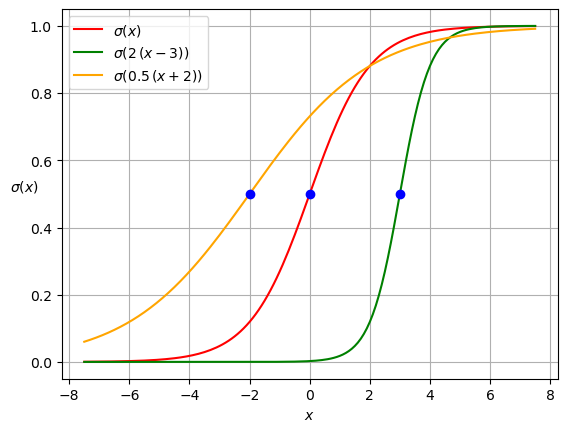

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 +np.exp(-x))

LOW, HIGH, DX = -7.5, 7.5, 0.1 
npoints = int((HIGH-LOW)/DX) + 1  # Number of pts
x = np.linspace(LOW,HIGH,npoints)
y = sigmoid(x)
w1, b1 = 2.0, -6.0  # Weight and Bias
z1 = sigmoid(w1*x + b1)
w2, b2 = 0.5, 1.0  
z2 = sigmoid(w2*x + b2)


plt.plot(x,y,label=r"$\sigma(x)$", color="red")
plt.plot(x,z1,label=r"$\sigma(2\,(x-3))$", color="green")
plt.plot(x,z2,label=r"$\sigma(0.5\,(x+2))$", color="orange")
plt.plot(0.0,0.5,'bo')
plt.plot(-b1/w1,0.5,'bo')
plt.plot(-b2/w2,0.5,'bo')
plt.xlabel(r"$x$")
plt.ylabel(r"$\sigma(x)$",rotation=0)
plt.legend()
plt.grid()

### 2.(Deep) Neural networks

#### 2.1.Definition

A $\textcolor{blue}{\textbf{neural network}}$ is a graph consisting of $\textcolor{blue}{\textbf{artificial neurons}}$.<br>
The artificial neurons (represented as dots/circles) that are<br> 
graphically stacked in the same vertical column form a $\textcolor{blue}{\textbf{layer}}$.

Neural networks often have multiple layers and therefore bear the name deep neural networks (DNN). The terminology deep neural networks and neural networks are used interchangeably.

Each neural network has 2 types of layers:
* special kind of layers, i.e.:
  - input layer (first layer)
  - output layer (final layer)
* hidden layers, i.e. the layers between the input and output layers

$\textcolor{green}{\textbf{Generally}}$, $\textcolor{blue}{\textbf{all}}$ artifical neurons in layer $k$:
* $\textcolor{blue}{\textbf{receive information directly}}$ from all artificial neurons in the $\textcolor{blue}{\textbf{previous layer}}$ ($k-1$).
* $\textcolor{blue}{\textbf{emit information directly}}$ to all artifical neurons in the $\textcolor{blue}{\textbf{subsequent layer}}$ ($k+1$).

The information flow is graphically depicted by $\textcolor{blue}{\textbf{directed/pointed arrows}}$.

$\textcolor{red}{\textbf{Note}}$:
* The input layer only emits info.
* The output layer only receives info.

#### 2.2. Example of a neural network

![dnn-example](dnn2.jpeg)

The above neural network has $5$ layers: <br>
* Input layer: $x^{[1]}$ (input-vector $\in \mathbb{R}^5$)
* Output layer: $x^{[5]}$ (output-vector $\in \mathbb{R}^3$)
* Hidden layers:
  - $x^{[2]}$ $ \in \mathbb{R}^4$
  - $x^{[3]}$ $ \in \mathbb{R}^6$ 
  - $x^{[4]}$ $ \in \mathbb{R}^4$  

#### 2.3.General form of a DNN

* Let's consider a neural network with N layers i.e.<br>
  $\mathbf{x}^{[1]}, \mathbf{x}^{[2]}, \ldots, \mathbf{x}^{[N]}$
  where $\mathbf{x}^{[k]} \in \mathbb{R}^{n^{[k]}}$  ($k \in \{1,2,\ldots,N\}$)
* Let $\mathbf{W}^{[k+1]}$ be the weight matrix which connects the neurons<br>
  of layer $k$ with those of layer $k+1$ ($k \in \{1,2,\ldots,N-1\}$).<br>
  Note: $\mathbf{W}^{[k+1]} \in \mathbb{R}^{n^{[k]} \times n^{[k+1]}}$.
* Let $\mathbf{b}^{[k+1]}$ be the bias vector which connects the neurons<br>
  of layer $k$ with those of layer $k+1$ (n^{[i+1]}.<br>
  Note: $\mathbf{b}^{[k+1]} \in \mathbb{R}^{n^{[k+1]} \times 1}$
* Let $f^{[k+1,k]}$ be the activation function which acts on the input <br>
  of layer $k$ to generate the signal for layer $k+1$ ($k \in \{1,2,\ldots,N-1\}$).

Thus, we get:<br>
$\mathbf{x}^{[k+1]}=f^{[k+1,k]}(\mathbf{W}^{[k+1]} \mathbf{x}^{[k]} + \mathbf{b}^{[k+1]})$

or in component-form:<br>
$\mathbf{x}_i^{[k+1]}=\displaystyle f^{[k+1,k]}\Bigg(\sum_{j=1}^{n^{[k]}}\mathbf{W}_{ij}^{[k+1]} \mathbf{x}_j^{[k]} + \mathbf{b}_i^{[k+1]} \Bigg)$<br>
where:
- $k \in \{1,2,\ldots,N-1\}$
- $i \in \{1,2,\ldots, n^{[k+1]}\}$
- $j \in \{1,2,\ldots, n^{[k]}\}$

In the $\textcolor{blue}{\textbf{training}}$ of a DNN we will try to find
the optimal parameters w.r.t a given criterium <br>($\textcolor{blue}{\textbf{cost function}}$) for $\mathbf{W}^{[k+1]}$ and $\mathbf{b}^{[k+1]}$ where $k \in \{1,2,\ldots,N-1\}$.

#### 2.4 Example of a neural network (Part 2)